<a href="https://www.kaggle.com/code/oscarm524/ps-s3-ep14-eda-modeling-submission?scriptVersionId=129207999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#1)

[2. Loading Libraries](#2)

[3. Reading Data Files](#3)

[4. Data Description](#4)

[5. Data Exploration](#5)

[6. Baseline Modeling 1.0](#6)

[7. Baseline Modeling 2.0](#7)

[8. Baseline Modeling 3.0](#8)

[9. Baseline Modeling 4.0](#9)

<a id="1"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

1. Version 1 (05/02/2023)
    * EDA 
    * Baseline modeling 1.0
    
2. Version 2 (05/02/2023)
    * Fixing bug

3. Version 3 (05/05/2023)
    * Cleaning/updating more input features.
    
4. Version 4 (05/05/2023)
    * Cleaning/updating more input features.
    
5. Version 5 (05/09/2023)
    * Baseline modeling 2.0 added.
    
6. Version 6 (05/09/2023)
    * Fixing bug.
    
7. Version 7 (05/09/2023)
    * Baseline modeling 2.0 updated.
    
8. Version 8 (05/09/2023)
    * Fxing bug.
    
9. Version 9 (05/10/2023)
    * Baseline modeling 3.0 added.
    
10. Version 10 (05/10/2023)
    * Fixing bug.
    
11. Version 11 (05/11/2023)
    * Baseline modeling 4.0 added.


<a id="2"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>        

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="3"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/playground-series-s3e14/train.csv')
test = pd.read_csv('../input/playground-series-s3e14/test.csv')
original = pd.read_csv('../input/wild-blueberry-yield-prediction-dataset/WildBlueberryPollinationSimulationData.csv')
submission = pd.read_csv('../input/playground-series-s3e14/sample_submission.csv')

print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)
print('The dimension of the orginal dataset is:', original.shape)
print('The dimension of the submission dataset is:', submission.shape)

The dimension of the train dataset is: (15289, 18)
The dimension of the test dataset is: (10194, 17)
The dimension of the orginal dataset is: (777, 18)
The dimension of the submission dataset is: (10194, 2)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [4]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [5]:
train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [6]:
test.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,20385.500000,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,2942.898656,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,15289.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,17837.250000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,20385.500000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,22933.750000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,25482.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


> <div class="alert alert-block alert-info">
<b>💡</b> There are no missing values neither in the train nor test datasets. Also, by a quick eye-ball comparison of the summary statistics of the train and test datasets, they seem to have similar distributions. 
</div>

<a id="4"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Description</h1>

This is a synthetic dataset generated from the [Wild blueberry Yield Prediction Dataset](https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset) dataset. These are the descriptions of the variables in this dataset:

<ul>
<li> clonesize: the average blueberry clone size in the field. </li>
<li> honeybee: honeybee density in the field. </li>
<li> bumbles: bumblebee density in the field. </li> 
<li> andrena: andrena bee density in the field. </li>
<li> osmia: osmia bee density in the field. </li>
<li> MaxOfUpperTRange: the highest record of the upper band daily air temperature during the bloom season. </li>
<li> MinOfUpperTRange: the lowest record of the upper band daily air temperature. </li>
<li> AverageOfUpperTRange: the average of the upper band daily air temperature. </li>
<li> MaxOfLowerTRange: the highest record of the lower band daily air temperature. </li>
<li> MinOfLowerTRange: the lowest record of the lower band daily air temperature. </li>
<li>AverageOfLowerTRange: the average of the lower band daily air temperature. </li>
<li> RainingDays: the total number of days during the bloom season, each of which has precipitation larger than zero. </li>
<li> AverageRainingDays: the average of raining days of the entire bloom season. </li>
</ul>

<a id="5"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1> 

We first start by visualizing the target variable.

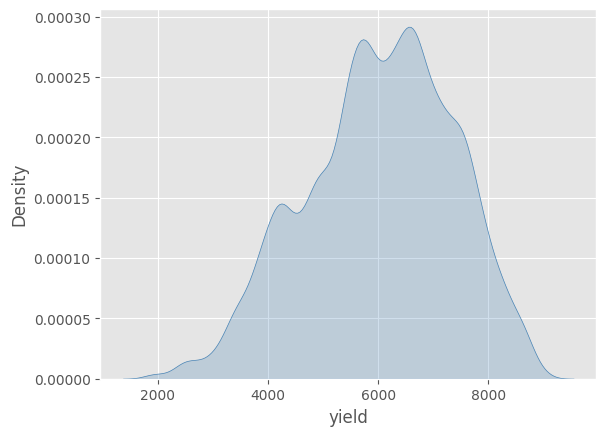

In [7]:
sns.kdeplot(data = train, x = 'yield', fill = True, color = 'steelblue');

From the above, it seems that the distribution of `yield` is multi-modal and slightly skewed to the left. Next, we explore the relationship among the input features.

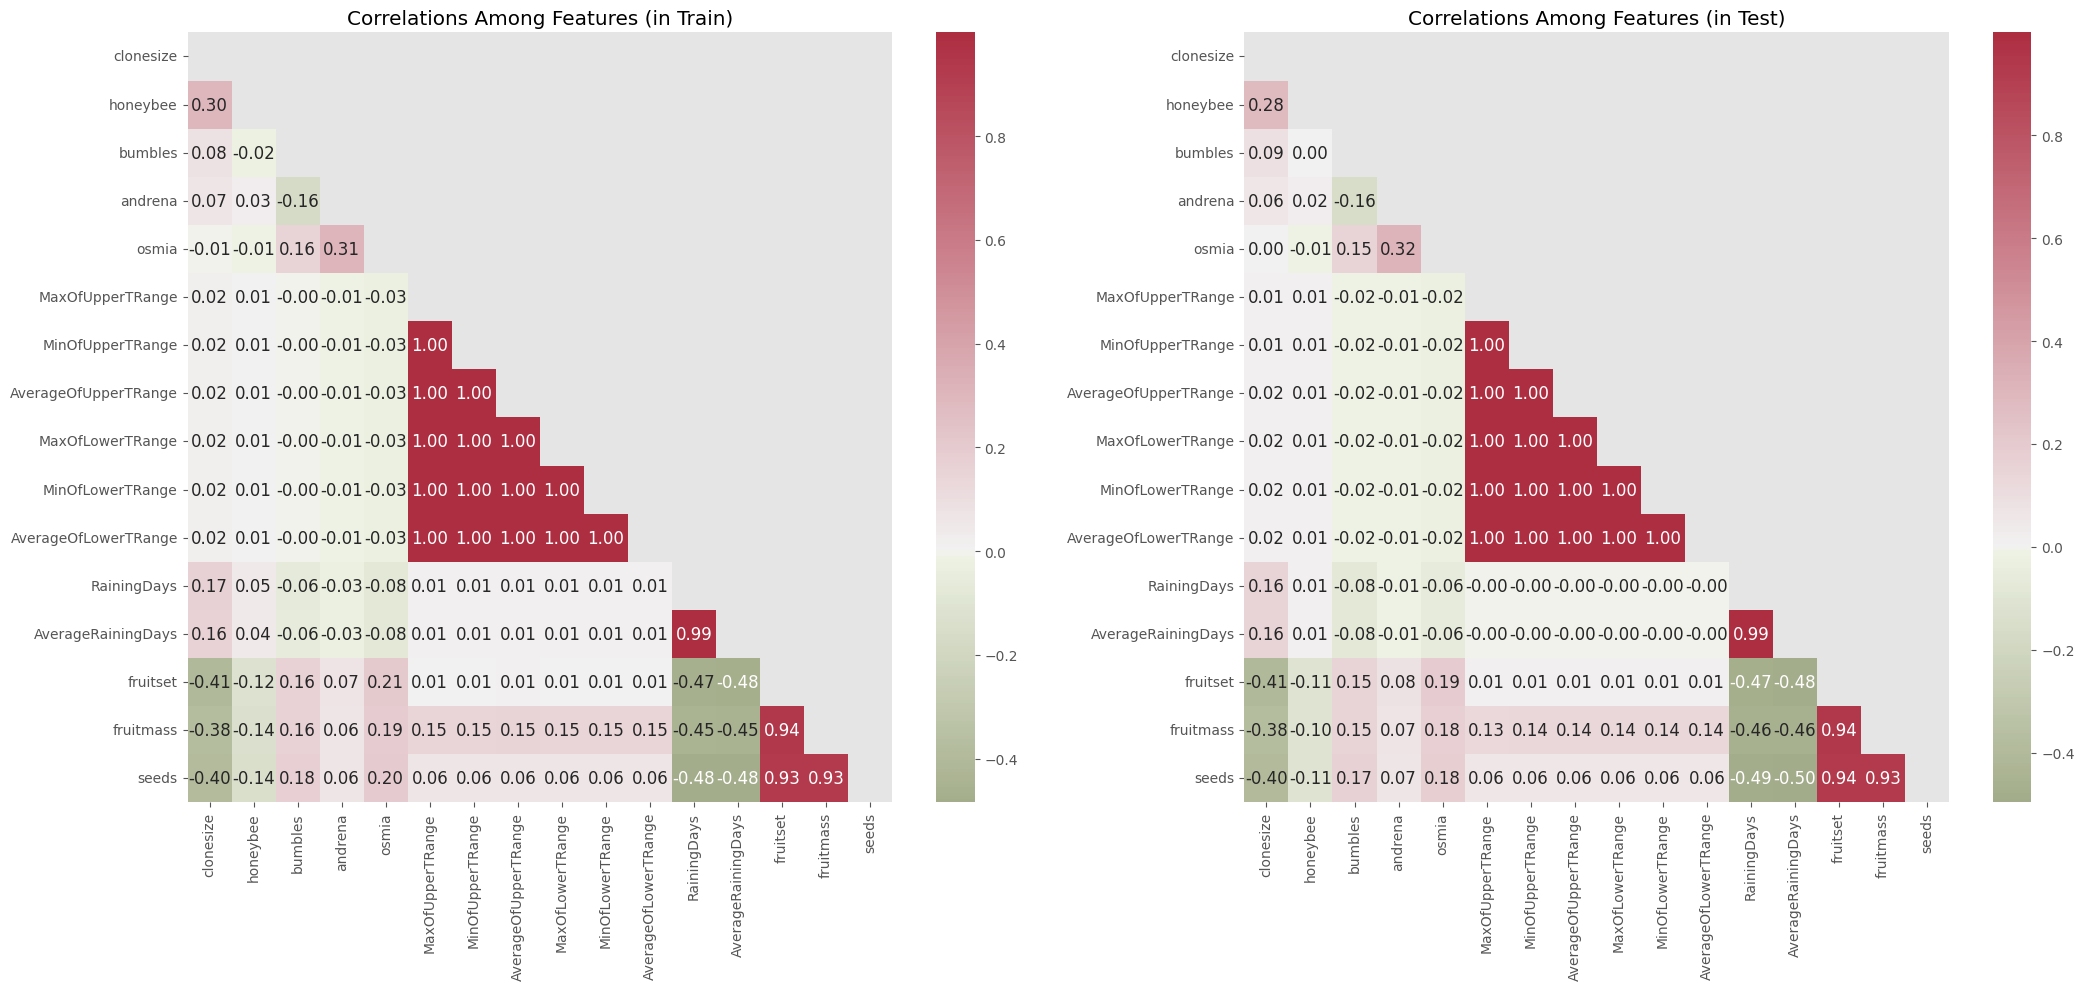

In [8]:
corr_mat_train = train.drop(columns = ['id', 'yield'], axis = 1).corr()
corr_mat_test = test.drop(columns = ['id'], axis = 1).corr()

train_mask = np.triu(np.ones_like(corr_mat_train, dtype = bool))
test_mask = np.triu(np.ones_like(corr_mat_test, dtype = bool))

cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 5, center = 'light', as_cmap = True)

fig, axes = plt.subplots(1, 2, figsize = (25, 10))
sns.heatmap(corr_mat_train, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, ax = axes[0], mask = train_mask).set_title('Correlations Among Features (in Train)')
sns.heatmap(corr_mat_test, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, ax = axes[1], mask = test_mask).set_title('Correlations Among Features (in Test)');

From the above, we see there are a few features that have either a perfect correlation or a very high one. Next, we explore the relationship between the input features and the target variable, `yield`.

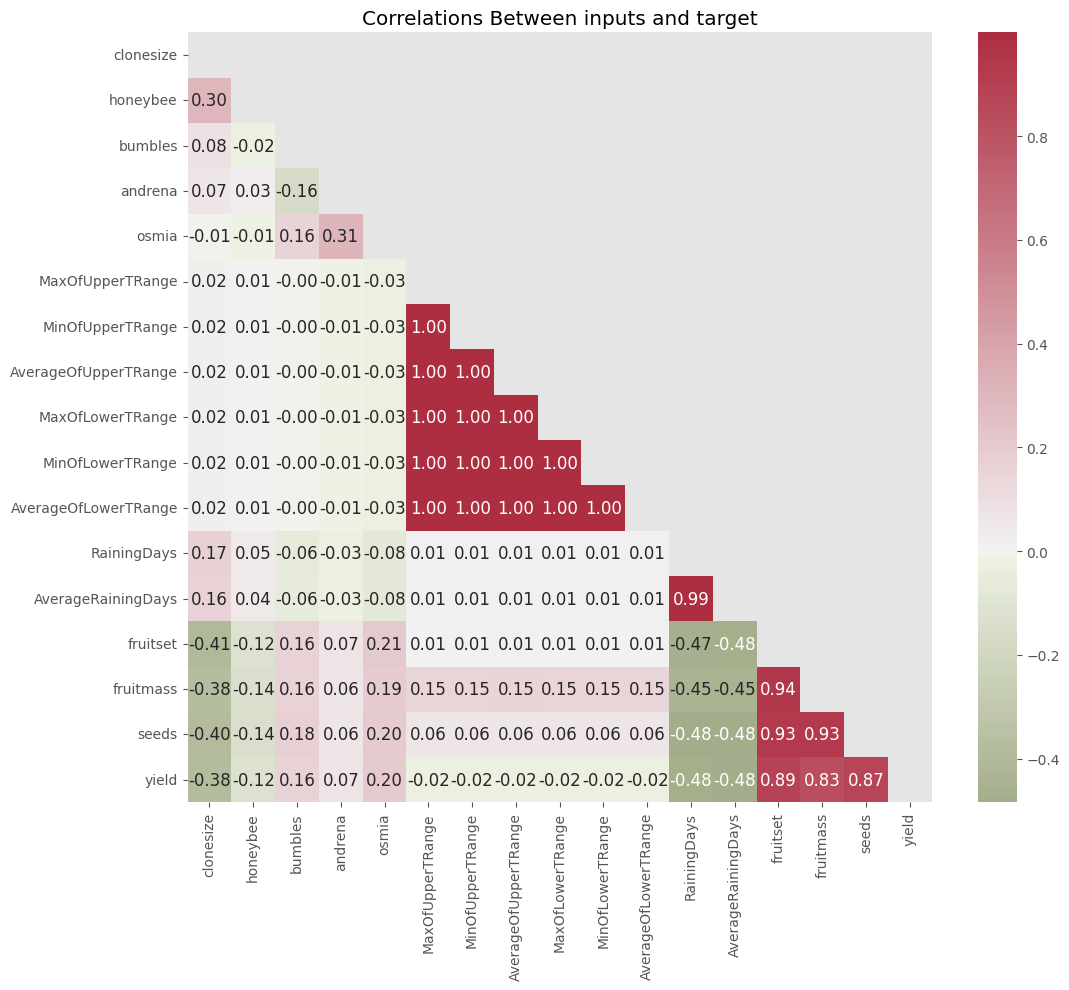

In [9]:
corr_mat_train = train.drop(columns = ['id'], axis = 1).corr()
train_mask = np.triu(np.ones_like(corr_mat_train, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 5, center = 'light', as_cmap = True)

plt.figure(figsize = (12, 10))
sns.heatmap(corr_mat_train, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = train_mask).set_title('Correlations Between inputs and target');

From the above, we see there is strong positive correlation between `fruitset` and `yield`. There is also a strong positive correlation between `seeds` and `yield`. Notice that there are four features that seem to be categorical even though they are stored as numeric. 

In [10]:
print('---------------------')
print('--- Train Dataset ---')
print('---------------------')
print('clonesize has the following unique values: \n', train['clonesize'].unique())
print('honeybee has the following unique values: \n', train['honeybee'].unique())
print('bumbles has the following unique values: \n', train['bumbles'].unique())
print('osmia has the following unique values: \n', train['osmia'].unique(), '\n')

print('--------------------')
print('--- Test Dataset ---')
print('--------------------')
print('clonesize has the following unique values: \n', test['clonesize'].unique())
print('honeybee has the following unique values: \n', test['honeybee'].unique())
print('bumbles has the following unique values: \n', test['bumbles'].unique())
print('osmia has the following unique values: \n', test['osmia'].unique(), '\n')

---------------------
--- Train Dataset ---
---------------------
clonesize has the following unique values: 
 [25.  12.5 37.5 20.  10.  40. ]
honeybee has the following unique values: 
 [ 0.5    0.25   0.75   0.537  0.    18.43   6.64 ]
bumbles has the following unique values: 
 [0.25  0.38  0.117 0.058 0.56  0.065 0.    0.585 0.042 0.293 0.26 ]
osmia has the following unique values: 
 [0.5   0.63  0.75  0.25  0.38  0.058 0.117 0.62  0.585 0.    0.021 0.02
 0.078 0.606] 

--------------------
--- Test Dataset ---
--------------------
clonesize has the following unique values: 
 [25.  12.5 37.5 20.  10. ]
honeybee has the following unique values: 
 [ 0.25   0.5    0.75   0.     0.537 18.43   6.64 ]
bumbles has the following unique values: 
 [0.25  0.38  0.058 0.    0.117 0.065 0.585 0.042]
osmia has the following unique values: 
 [0.25  0.63  0.75  0.5   0.38  0.117 0.585 0.058 0.033 0.06  0.53  0.
 0.021 0.101] 



The number values in the above features is not consistent in the train and test datasets. Next  we check for duplicates.

In [11]:
print('There are ', train.shape[0], 'observations in the train datset')
print('There are ', train.drop(columns = ['id', 'yield'], axis = 1).drop_duplicates().shape[0], 'unique observations in the train dataset')

There are  15289 observations in the train datset
There are  15275 unique observations in the train dataset


In [12]:
print('There are ', test.shape[0], 'observations in the test datset')
print('There are ', test.drop(columns = ['id'], axis = 1).drop_duplicates().shape[0], 'unique observations in the test dataset')

There are  10194 observations in the test datset
There are  10191 unique observations in the test dataset


In [13]:
to_consider = train.drop(columns = ['id', 'yield'], axis = 1).columns.tolist()

train_dup = train.drop(columns = ['id', 'yield'], axis = 1).drop_duplicates()
test_dup = test.drop(columns = ['id'], axis = 1).drop_duplicates()
duplicates = pd.merge(train_dup, test_dup, on = to_consider)

print('There are', duplicates.shape[0], 'rows that appear in the train and test dataset.\n')

There are 18 rows that appear in the train and test dataset.



Next we take a closer look at the relationship between `clonesize` and `yield`.

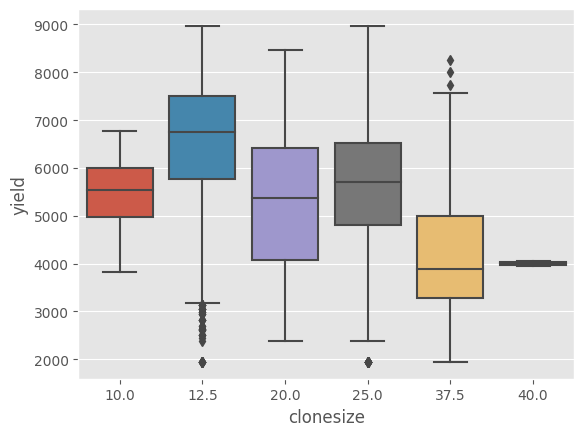

In [14]:
sns.boxplot(data = train, x = 'clonesize', y = 'yield');

If we use the following changes in `clonesize` as follows:

- In `train`:
    - `40.0` -> `37.5`
    - `10.0` -> `12.5`
    - `20.0` -> `25.0`
- In `test`:
    - `10.0` -> `12.5`
    - `20.0` -> `25.0`

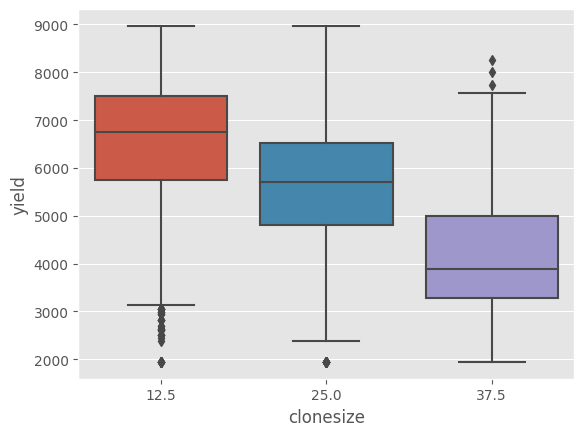

In [15]:
train['clonesize'] = np.where(train['clonesize'] == 40.0, 37.5, train['clonesize'])
train['clonesize'] = np.where(train['clonesize'] == 10.0, 12.5, train['clonesize'])
train['clonesize'] = np.where(train['clonesize'] == 20.0, 25.0, train['clonesize'])

test['clonesize'] = np.where(test['clonesize'] == 10.0, 12.5, test['clonesize'])
test['clonesize'] = np.where(test['clonesize'] == 20.0, 25.0, test['clonesize'])

original['clonesize'] = np.where(original['clonesize'] == 40.0, 37.5, original['clonesize'])
original['clonesize'] = np.where(original['clonesize'] == 10.0, 12.5, original['clonesize'])
original['clonesize'] = np.where(original['clonesize'] == 20.0, 25.0, original['clonesize'])

sns.boxplot(data = train, x = 'clonesize', y = 'yield');

From the above, we now see that the relationship between `clonesize` and `yield` is clear. Next we take a closer look at `honeybee` and `yield`.

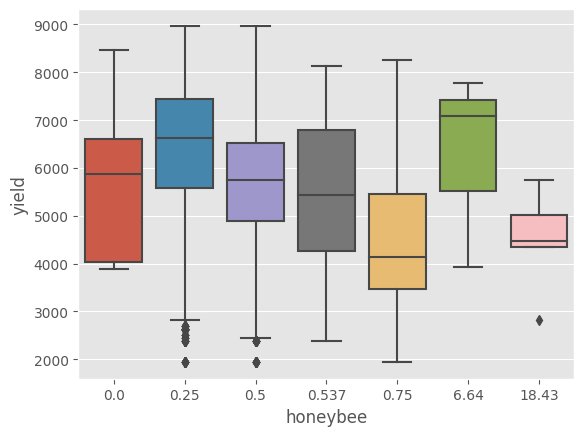

In [16]:
sns.boxplot(data = train, x = 'honeybee', y = 'yield');

If we use the following changes in `honeybee` as follows:

- In `train` and `test`:
    - `0.000` -> `0.250`
    - `0.537` -> `0.500`
    - `6.640` -> `0.750`
    - `18.430` -> `0.750`

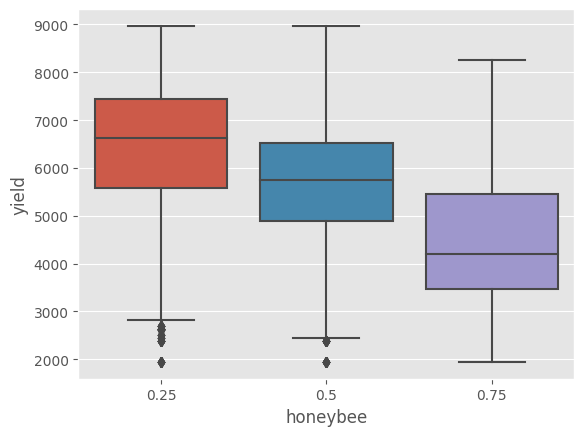

In [17]:
train['honeybee'] = np.where(train['honeybee'] == 0.000, 0.250, train['honeybee'])
train['honeybee'] = np.where(train['honeybee'] == 0.537, 0.500, train['honeybee'])
train['honeybee'] = np.where(train['honeybee'] == 6.640, 0.750, train['honeybee'])
train['honeybee'] = np.where(train['honeybee'] == 18.430, 0.750, train['honeybee'])

test['honeybee'] = np.where(test['honeybee'] == 0.000, 0.250, test['honeybee'])
test['honeybee'] = np.where(test['honeybee'] == 0.537, 0.500, test['honeybee'])
test['honeybee'] = np.where(test['honeybee'] == 6.640, 0.750, test['honeybee'])
test['honeybee'] = np.where(test['honeybee'] == 18.430, 0.750, test['honeybee'])

original['honeybee'] = np.where(original['honeybee'] == 0.000, 0.250, original['honeybee'])
original['honeybee'] = np.where(original['honeybee'] == 0.537, 0.500, original['honeybee'])
original['honeybee'] = np.where(original['honeybee'] == 6.640, 0.750, original['honeybee'])
original['honeybee'] = np.where(original['honeybee'] == 18.430, 0.750, original['honeybee'])

sns.boxplot(data = train, x = 'honeybee', y = 'yield');

From the above, we see the relationship between `honeybee` and `yield` is clear. Next, we take a closer look at `bumbles` and `yield`.

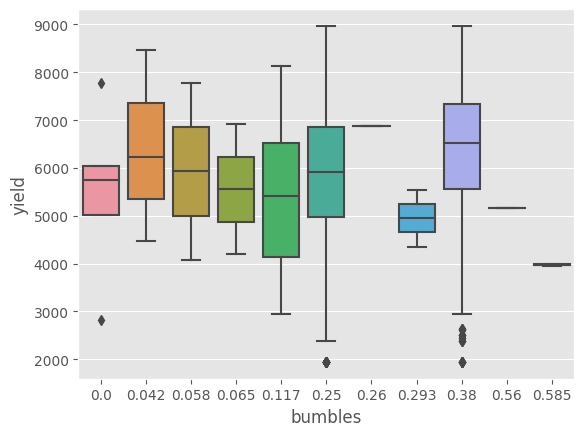

In [18]:
sns.boxplot(data = train, x = 'bumbles', y = 'yield');

If we use the following changes in `bumbles` as follows:

- In `train`:
    - `0.000` -> `0.117`
    - `0.042` -> `0.117`
    - `0.058` -> `0.117`
    - `0.065` -> `0.117`
    - `0.585` -> `0.380`
    - `0.293` -> `0.250`
    - `0.560` -> `0.380`
    - `0.260` -> `0.250`
- In `test`:
    - `0.000` -> `0.117`
    - `0.042` -> `0.117`
    - `0.058` -> `0.117`
    - `0.065` -> `0.117`
    - `0.585` -> `0.380`

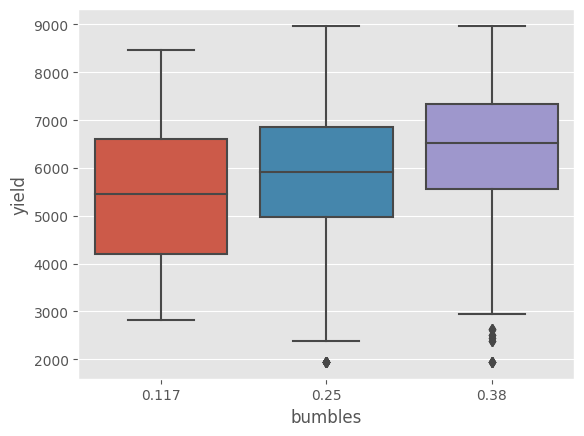

In [19]:
train['bumbles'] = np.where(train['bumbles'] == 0.000, 0.117, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.042, 0.117, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.058, 0.117, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.065, 0.117, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.585, 0.380, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.293, 0.250, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.560, 0.380, train['bumbles'])
train['bumbles'] = np.where(train['bumbles'] == 0.260, 0.250, train['bumbles'])

test['bumbles'] = np.where(test['bumbles'] == 0.000, 0.117, test['bumbles'])
test['bumbles'] = np.where(test['bumbles'] == 0.042, 0.117, test['bumbles'])
test['bumbles'] = np.where(test['bumbles'] == 0.058, 0.117, test['bumbles'])
test['bumbles'] = np.where(test['bumbles'] == 0.065, 0.117, test['bumbles'])
test['bumbles'] = np.where(test['bumbles'] == 0.585, 0.380, test['bumbles'])

original['bumbles'] = np.where(original['bumbles'] == 0.000, 0.117, original['bumbles'])
original['bumbles'] = np.where(original['bumbles'] == 0.042, 0.117, original['bumbles'])
original['bumbles'] = np.where(original['bumbles'] == 0.058, 0.117, original['bumbles'])
original['bumbles'] = np.where(original['bumbles'] == 0.065, 0.117, original['bumbles'])
original['bumbles'] = np.where(original['bumbles'] == 0.585, 0.380, original['bumbles'])
original['bumbles'] = np.where(original['bumbles'] == 0.293, 0.250, original['bumbles'])
original['bumbles'] = np.where(original['bumbles'] == 0.202, 0.250, original['bumbles'])

sns.boxplot(data = train, x = 'bumbles', y = 'yield');

From the above, we see the relationship between `bumbles` and `yield` is clear. Next, we take a closer look at `osmia` and `yield`.

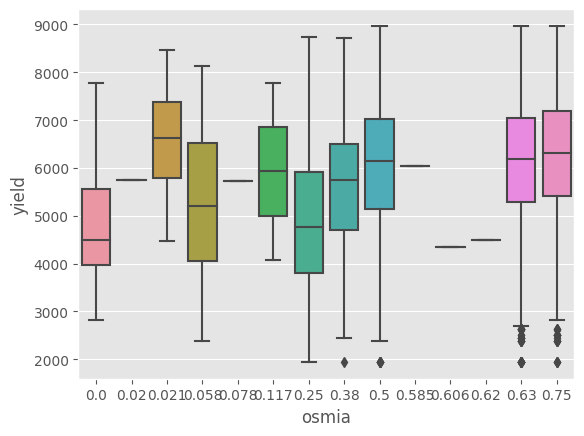

In [20]:
sns.boxplot(data = train, x = 'osmia', y = 'yield');

If we use the following changes in `osmia` as follows:

- In `train`:
    - `0.000` -> `0.058`
    - `0.021` -> `0.058`
    - `0.117` -> `0.058`
    - `0.620` -> `0.630`
    - `0.585` -> `0.630`
    - `0.020` -> `0.058`
    - `0.078` -> `0.058`
    - `0.606` -> `0.630`
- In `test`:
    - `0.000` -> `0.058`
    - `0.117` -> `0.058`
    - `0.585` -> `0.630`
    - `0.033` -> `0.058`
    - `0.060` -> `0.058`
    - `0.530` -> `0.500`
    - `0.021` -> `0.058`
    - `0.101` -> `0.058`

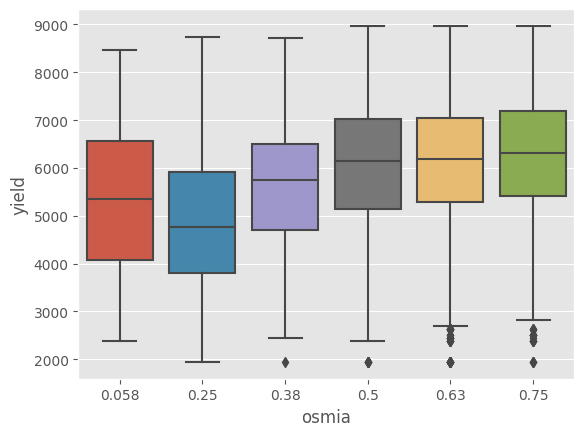

In [21]:
train['osmia'] = np.where(train['osmia'] == 0.000, 0.058, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.021, 0.058, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.117, 0.058, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.620, 0.630, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.585, 0.630, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.020, 0.058, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.078, 0.058, train['osmia'])
train['osmia'] = np.where(train['osmia'] == 0.606, 0.630, train['osmia'])

test['osmia'] = np.where(test['osmia'] == 0.000, 0.058, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.117, 0.058, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.585, 0.630, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.033, 0.058, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.060, 0.058, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.530, 0.500, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.021, 0.058, test['osmia'])
test['osmia'] = np.where(test['osmia'] == 0.101, 0.058, test['osmia'])

original['osmia'] = np.where(original['osmia'] == 0.000, 0.058, original['osmia'])
original['osmia'] = np.where(original['osmia'] == 0.021, 0.058, original['osmia'])
original['osmia'] = np.where(original['osmia'] == 0.101, 0.058, original['osmia'])
original['osmia'] = np.where(original['osmia'] == 0.033, 0.058, original['osmia'])
original['osmia'] = np.where(original['osmia'] == 0.585, 0.630, original['osmia'])
original['osmia'] = np.where(original['osmia'] == 0.117, 0.058, original['osmia'])

sns.boxplot(data = train, x = 'osmia', y = 'yield');

From the above, we see the relationship between `osmia` and `yield` is clear. Next, we take a closer look at `andrena` and `yield`.

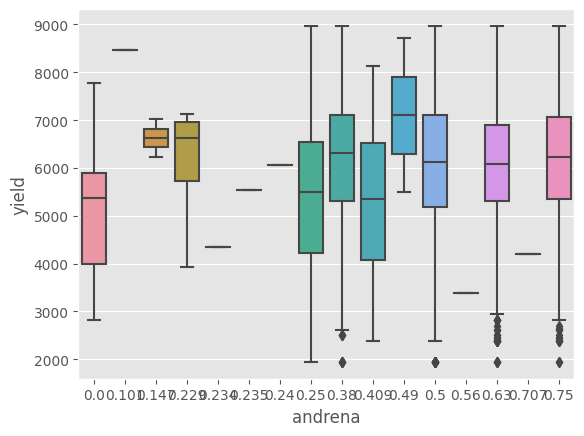

In [22]:
sns.boxplot(data = train, x = 'andrena', y = 'yield');

If we use the following changes in `andrena` as follows:

- In `train`:
    - `0.409` -> `0.380`
    - `0.000` -> `0.250`
    - `0.229` -> `0.250`
    - `0.490` -> `0.500`
    - `0.147` -> `0.250`
    - `0.707` -> `0.750`
    - `0.240` -> `0.250`
    - `0.560` -> `0.500`
    - `0.101` -> `0.250`
    - `0.234` -> `0.250`
    - `0.235` -> `0.250`
- In `test`:
    - `0.409` -> `0.380`
    - `0.000` -> `0.250`
    - `0.229` -> `0.250`
    - `0.260` -> `0.250`
    - `0.147` -> `0.250`
    - `0.585` -> `0.630`
    - `0.560` -> `0.500`

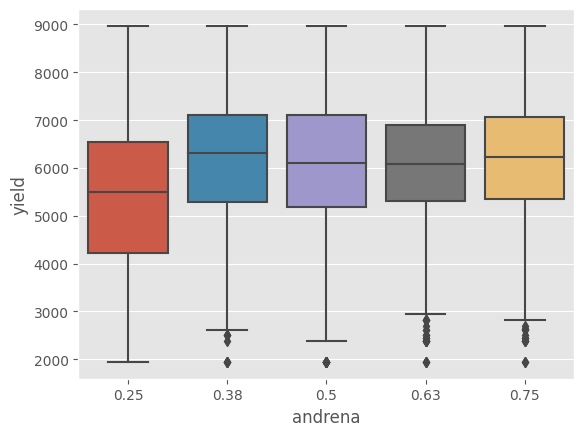

In [23]:
train['andrena'] = np.where(np.isin(train['andrena'], [0.000, 0.229, 0.147, 0.240, 0.101, 0.234, 0.235]), 0.250, train['andrena'])
train['andrena'] = np.where(train['andrena'] == 0.409, 0.380, train['andrena'])
train['andrena'] = np.where(np.isin(train['andrena'], [0.490, 0.560]), 0.500, train['andrena'])
train['andrena'] = np.where(train['andrena'] == 0.707, 0.750, train['andrena'])

test['andrena'] = np.where(np.isin(test['andrena'], [0.000, 0.229, 0.260, 0.147]), 0.250, test['andrena'])
test['andrena'] = np.where(test['andrena'] == 0.409, 0.380, test['andrena'])
test['andrena'] = np.where(test['andrena'] == 0.560, 0.500, test['andrena'])
test['andrena'] = np.where(test['andrena'] == 0.585, 0.630, test['andrena'])

original['andrena'] = np.where(np.isin(original['andrena'], [0.000, 0.147, 0.229, 0.234]), 0.250, original['andrena'])
original['andrena'] = np.where(original['andrena'] == 0.409, 0.380, original['andrena'])
original['andrena'] = np.where(original['andrena'] == 0.585, 0.630, original['andrena'])
original['andrena'] = np.where(original['andrena'] == 0.707, 0.750, original['andrena'])

sns.boxplot(data = train, x = 'andrena', y = 'yield');

Next, we take a closer look at `MaxOfUpperTRange` and `yield`.

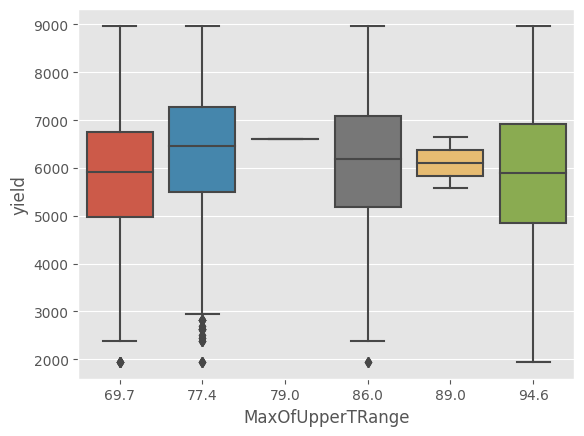

In [24]:
sns.boxplot(data = train, x = 'MaxOfUpperTRange', y = 'yield');

If we use the following changes in `MaxOfUpperTRange` as follows:

- In `train`:
    - `89.0` -> `86.0`
    - `79.0` -> `77.4`
- In `test`:
    - `89.0` -> `86.0`
    - `79.0` -> `77.4`
    - `71.9` -> `69.7`

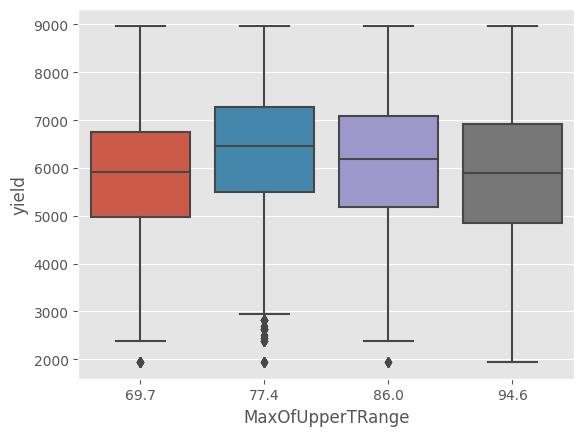

In [25]:
train['MaxOfUpperTRange'] = np.where(train['MaxOfUpperTRange'] == 89.0, 86.0, train['MaxOfUpperTRange'])
train['MaxOfUpperTRange'] = np.where(train['MaxOfUpperTRange'] == 79.0, 77.4, train['MaxOfUpperTRange'])

test['MaxOfUpperTRange'] = np.where(test['MaxOfUpperTRange'] == 89.0, 86.0, test['MaxOfUpperTRange'])
test['MaxOfUpperTRange'] = np.where(test['MaxOfUpperTRange'] == 79.0, 77.4, test['MaxOfUpperTRange'])
test['MaxOfUpperTRange'] = np.where(test['MaxOfUpperTRange'] == 71.9, 69.7, test['MaxOfUpperTRange'])

original['MaxOfUpperTRange'] = np.where(original['MaxOfUpperTRange'] == 89.0, 86.0, original['MaxOfUpperTRange'])

sns.boxplot(data = train, x = 'MaxOfUpperTRange', y = 'yield');

Next we take a closer look at `MinOfUpperTRange` and `yield`

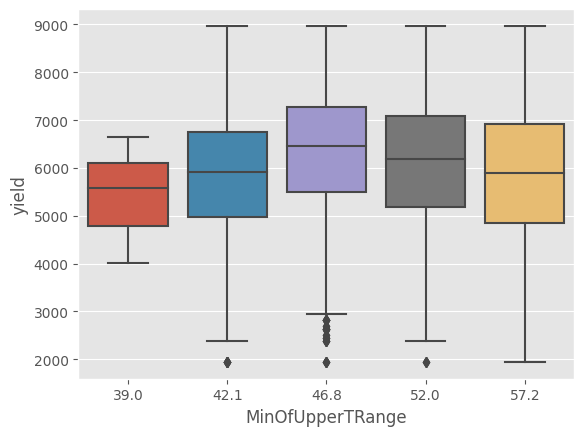

In [26]:
sns.boxplot(data = train, x = 'MinOfUpperTRange', y = 'yield');

If we use the following changes in `MinOfUpperTRange` as follows:

- In `train`:
    - `39.0` -> `42.1`
- In `test`:
    - `39.0` -> `42.1`
    - `55.8` -> `57.2`

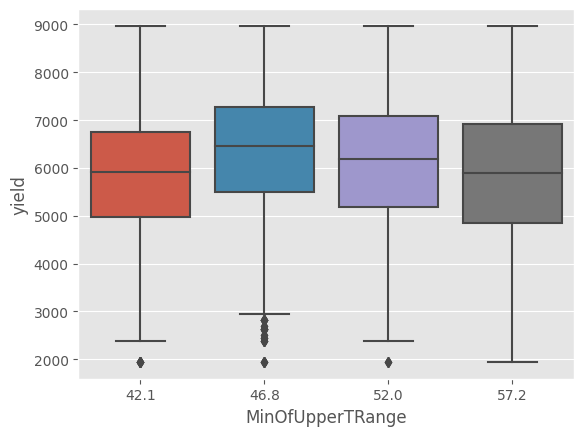

In [27]:
train['MinOfUpperTRange'] = np.where(train['MinOfUpperTRange'] == 39.0, 42.1, train['MinOfUpperTRange'])

test['MinOfUpperTRange'] = np.where(test['MinOfUpperTRange'] == 39.0, 42.1, test['MinOfUpperTRange'])
test['MinOfUpperTRange'] = np.where(test['MinOfUpperTRange'] == 55.8, 57.2, test['MinOfUpperTRange'])

original['MinOfUpperTRange'] = np.where(original['MinOfUpperTRange'] == 39.0, 42.1, original['MinOfUpperTRange'])

sns.boxplot(data = train, x = 'MinOfUpperTRange', y = 'yield');

Next we take a closer look at `AverageOfUpperTRange` and `yield`

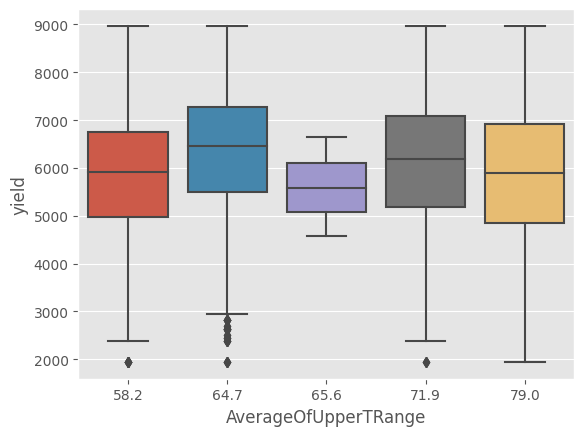

In [28]:
sns.boxplot(data = train, x = 'AverageOfUpperTRange', y = 'yield');

If we use the following changes in `MinOfUpperTRange` as follows:

- In `train`:
    - `65.6` -> `64.7`
- In `test`:
    - `65.6` -> `64.7`
    - `74.6` -> `71.9`

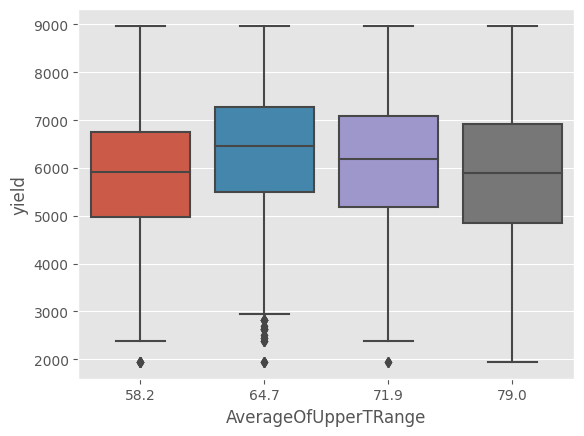

In [29]:
train['AverageOfUpperTRange'] = np.where(train['AverageOfUpperTRange'] == 65.6, 64.7, train['AverageOfUpperTRange'])

test['AverageOfUpperTRange'] = np.where(test['AverageOfUpperTRange'] == 65.6, 64.7, test['AverageOfUpperTRange'])
test['AverageOfUpperTRange'] = np.where(test['AverageOfUpperTRange'] == 74.6, 71.9, test['AverageOfUpperTRange'])

original['AverageOfUpperTRange'] = np.where(original['AverageOfUpperTRange'] == 65.6, 64.7, original['AverageOfUpperTRange'])

sns.boxplot(data = train, x = 'AverageOfUpperTRange', y = 'yield');

Next we take a closer look at `MaxofLowerTRange` and `yield`.

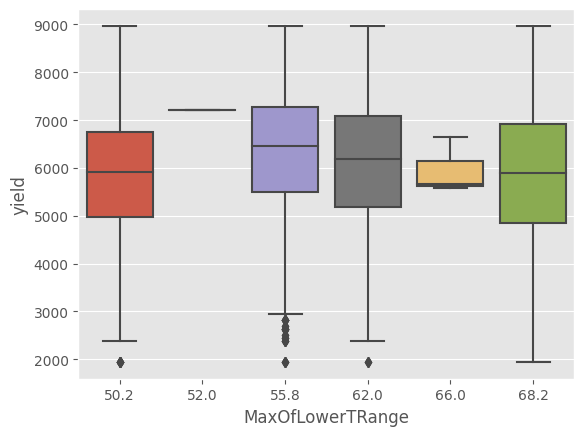

In [30]:
sns.boxplot(data = train, x = 'MaxOfLowerTRange', y = 'yield');

If we use the following changes in `MaxOfLowerTRange` as follows:

- In `train`:
    - `66.0` -> `68.2`
    - `52.0` -> `55.8`
- In `test`:
    - `66.0` -> `68.2`

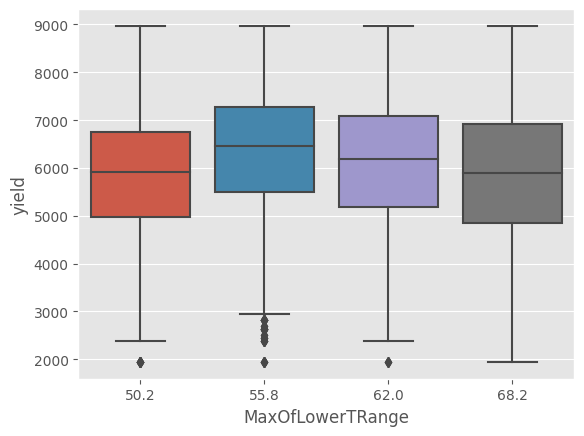

In [31]:
train['MaxOfLowerTRange'] = np.where(train['MaxOfLowerTRange'] == 66.0, 68.2, train['MaxOfLowerTRange'])
train['MaxOfLowerTRange'] = np.where(train['MaxOfLowerTRange'] == 52.0, 55.8, train['MaxOfLowerTRange'])

test['MaxOfLowerTRange'] = np.where(test['MaxOfLowerTRange'] == 65.6, 64.7, test['MaxOfLowerTRange'])

original['MaxOfLowerTRange'] = np.where(original['MaxOfLowerTRange'] == 66.0, 68.2, original['MaxOfLowerTRange'])

sns.boxplot(data = train, x = 'MaxOfLowerTRange', y = 'yield');

Next we take a closer look at `MinOfLowerTRange` and `yield`.

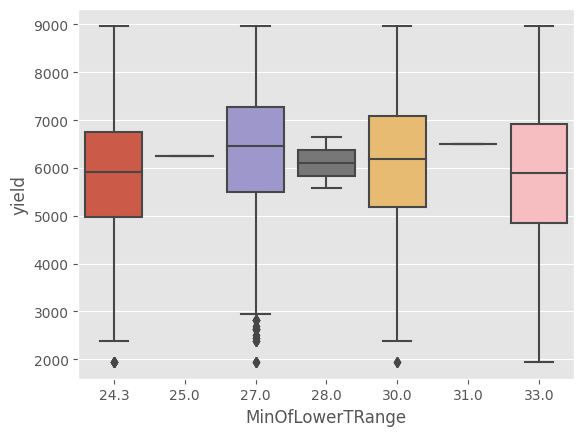

In [32]:
sns.boxplot(data = train, x = 'MinOfLowerTRange', y = 'yield');

If we use the following changes in `MinOfLowerTRange` as follows:

- In `train`:
    - `28.0` -> `27.0`
    - `25.0` -> `24.3`
    - `31.0` -> `30.0`
- In `test`:
    - `28.0` -> `27.0`

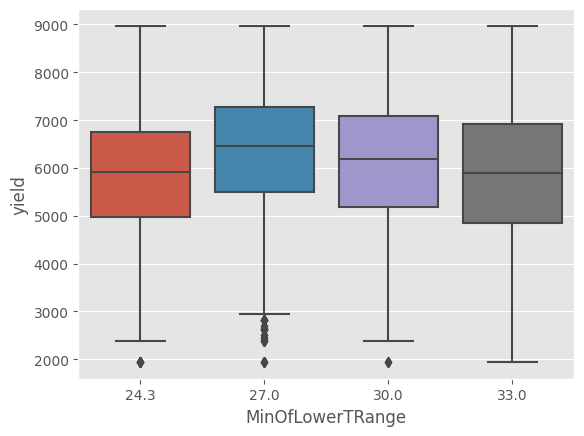

In [33]:
train['MinOfLowerTRange'] = np.where(train['MinOfLowerTRange'] == 28.0, 27.0, train['MinOfLowerTRange'])
train['MinOfLowerTRange'] = np.where(train['MinOfLowerTRange'] == 25.0, 24.3, train['MinOfLowerTRange'])
train['MinOfLowerTRange'] = np.where(train['MinOfLowerTRange'] == 31.0, 30.0, train['MinOfLowerTRange'])

test['MinOfLowerTRange'] = np.where(test['MinOfLowerTRange'] == 28.0, 27.0, test['MinOfLowerTRange'])

original['MinOfLowerTRange'] = np.where(original['MinOfLowerTRange'] == 28.0, 27.0, original['MinOfLowerTRange'])

sns.boxplot(data = train, x = 'MinOfLowerTRange', y = 'yield');

Next we take a closer look at `AverageOfLowerTRange` and `yield`.

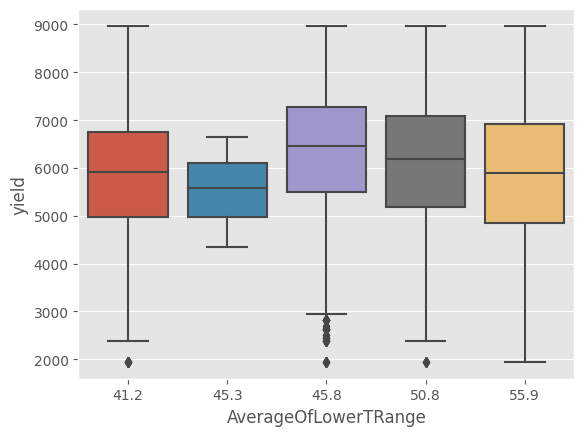

In [34]:
sns.boxplot(data = train, x = 'AverageOfLowerTRange', y = 'yield');

If we use the following changes in `AverageOfLowerTRange` as follows:

- In `train` and `test`:
    - `45.3` -> `45.8`

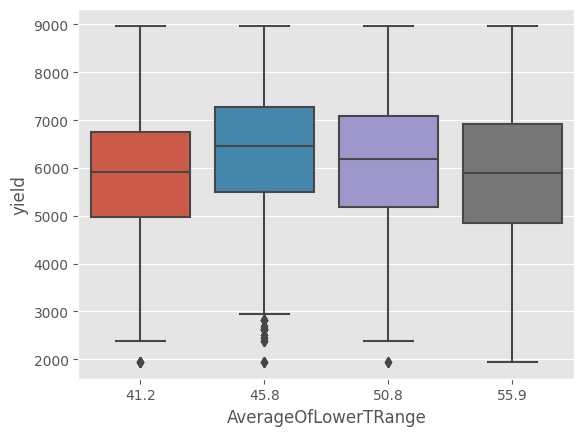

In [35]:
train['AverageOfLowerTRange'] = np.where(train['AverageOfLowerTRange'] == 45.3, 45.8, train['AverageOfLowerTRange'])

test['AverageOfLowerTRange'] = np.where(test['AverageOfLowerTRange'] == 45.3, 45.8, test['AverageOfLowerTRange'])

original['AverageOfLowerTRange'] = np.where(original['AverageOfLowerTRange'] == 45.3, 45.8, original['AverageOfLowerTRange'])

sns.boxplot(data = train, x = 'AverageOfLowerTRange', y = 'yield');

Next, we take a closer look at `RainingDays` and `yield`.

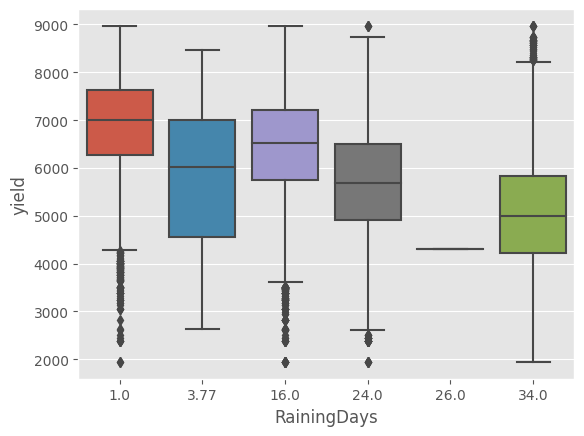

In [36]:
sns.boxplot(data = train, x = 'RainingDays', y = 'yield');

If we use the following changes in `RainingDays` as follows:

- In `train`:
    - `3.77` -> `1.00`
    - `26.00` -> `24.00`
- In `test`:
    - `3.77` -> `1.00`
    - `33.00` -> `34.00`

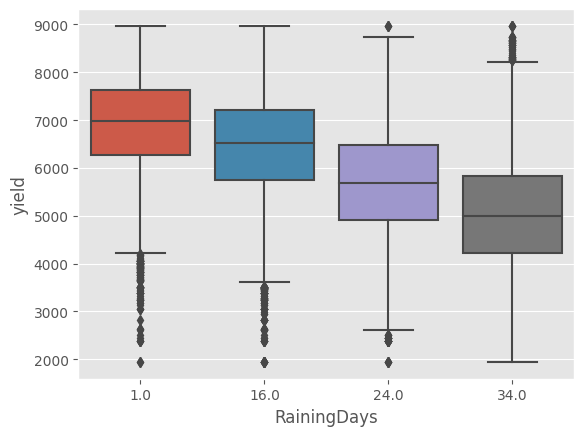

In [37]:
train['RainingDays'] = np.where(train['RainingDays'] == 3.77, 1.00, train['RainingDays'])
train['RainingDays'] = np.where(train['RainingDays'] == 26.00, 24.00, train['RainingDays'])

test['RainingDays'] = np.where(test['RainingDays'] == 3.77, 1.00, test['RainingDays'])
test['RainingDays'] = np.where(test['RainingDays'] == 33.00, 34.00, test['RainingDays'])

original['RainingDays'] = np.where(original['RainingDays'] == 3.77, 1.00, original['RainingDays'])

sns.boxplot(data = train, x = 'RainingDays', y = 'yield');

From the above, we see the relationship between `RainingDays` and `yield` is clear. Next, we explore the relationship between `fruitset` and `yield`. Next we take a closer look at `AverageRainingDays` and `yield`.

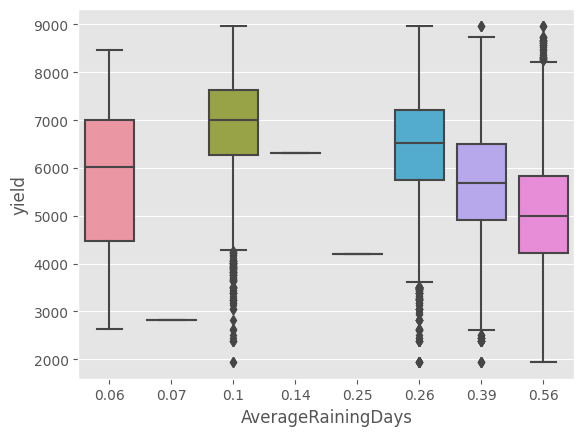

In [38]:
sns.boxplot(data = train, x = 'AverageRainingDays', y = 'yield');

If we use the following changes in `AverageRainingDays` as follows:

- In `train`:
    - `0.06` -> `0.10`
    - `0.25` -> `0.26`
    - `0.07` -> `0.10`
    - `0.14` -> `0.10`
- In `test`:
    - `0.06` -> `0.10`

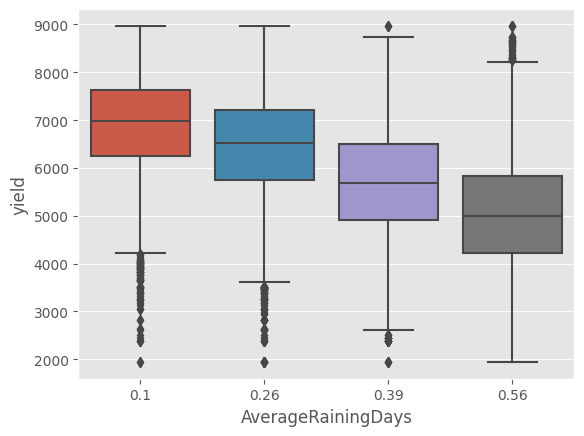

In [39]:
train['AverageRainingDays'] = np.where(np.isin(train['AverageRainingDays'], [0.06, 0.07, 0.14]), 0.10, train['AverageRainingDays'])
train['AverageRainingDays'] = np.where(train['AverageRainingDays'] == 0.25, 0.26, train['AverageRainingDays'])

test['AverageRainingDays'] = np.where(test['AverageRainingDays'] == 0.06, 0.10, test['RainingDays'])

original['AverageRainingDays'] = np.where(original['AverageRainingDays'] == 0.06, 0.10, original['AverageRainingDays'])

sns.boxplot(data = train, x = 'AverageRainingDays', y = 'yield');

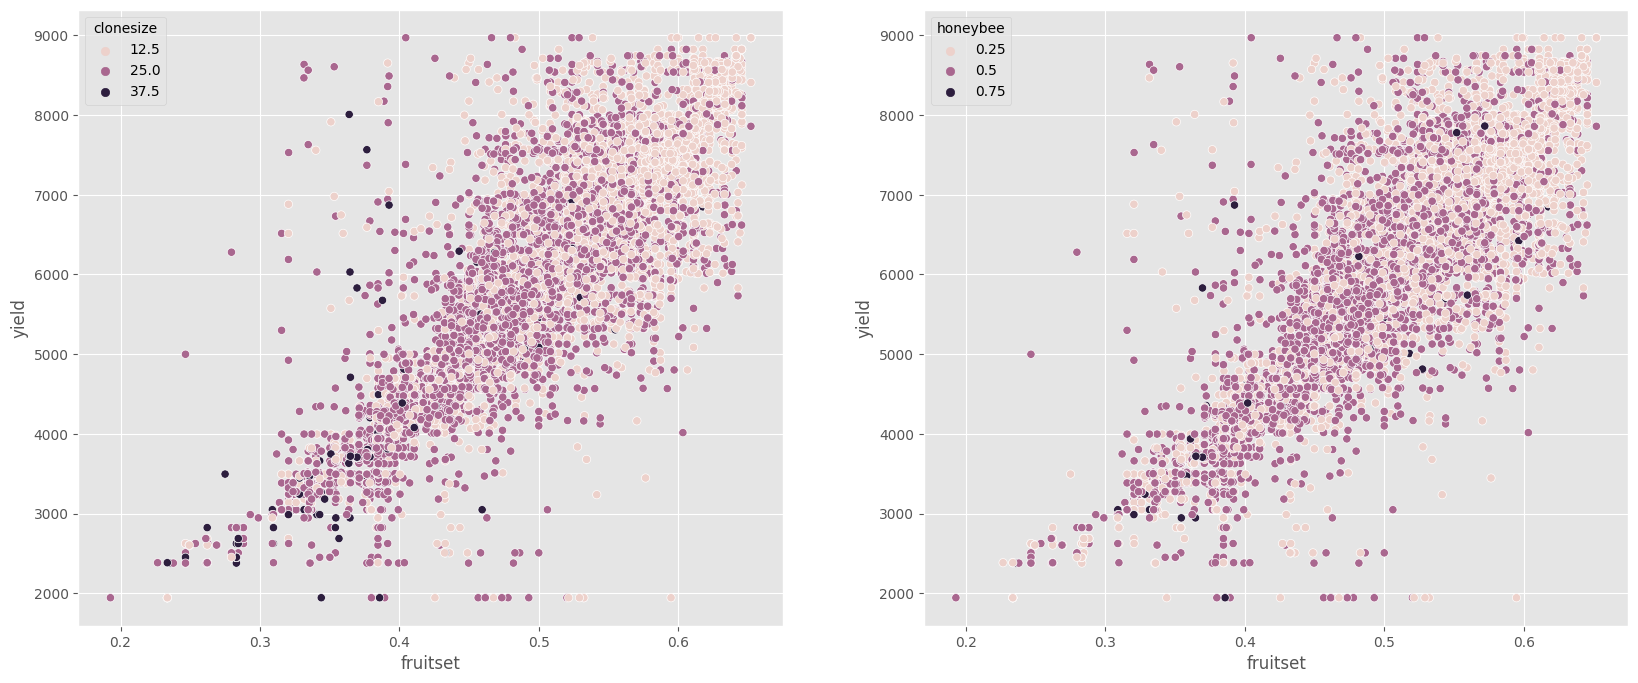

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

sns.scatterplot(ax = axes[0], data = train, x = 'fruitset', y = 'yield', hue = 'clonesize');
sns.scatterplot(ax = axes[1], data = train, x = 'fruitset', y = 'yield', hue = 'honeybee');

From the above scatter-plots, the relationship between `fruitset` and `yield` is aprroximately linear.

<a id="6"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 1.0</h1>

First, we consolidate the `train` and `original` datasets as follows:

In [41]:
train['generated'] = 1
original['generated'] = 0
test['generated'] = 1

train.drop(columns = 'id', axis = 1, inplace = True)
original.drop(columns = 'Row#', axis = 1, inplace = True)

train = pd.concat([train, original], axis = 0).reset_index(drop = True)

Next we proceed to build a couple of baseline models as shown below.

In [42]:
X = train.drop(columns = ['yield'], axis = 1)
Y = train['yield']

test_baseline = test.drop(columns = ['id'], axis = 1)

xgb_imp, lgb_imp = list(), list()
hist_cv_scores, lgb_cv_scores, xgb_cv_scores = list(), list(), list()
ens_cv_scores = list()
hist_preds, lgb_preds, xgb_preds, ens_preds = list(), list(), list(), list()

for i in tqdm(range(1)):

    skf = KFold(n_splits = 10, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ##########################
        ## HistGradientBoosting ##
        ##########################
        
        hist_md = HistGradientBoostingRegressor(loss = 'absolute_error',
                                                l2_regularization = 0.01,
                                                early_stopping = False,
                                                learning_rate = 0.01,
                                                max_iter = 1000,
                                                max_depth = 15,
                                                max_bins = 255,
                                                min_samples_leaf = 30,
                                                max_leaf_nodes = 30).fit(X_train, Y_train)
        
        ##############
        ## LightGBM ##
        ##############
        
        lgb_md = LGBMRegressor(objective = 'mae', 
                               n_estimators = 1000,
                               max_depth = 10,
                               learning_rate = 0.01,
                               num_leaves = 70,
                               reg_alpha = 3,
                               reg_lambda = 3,
                               subsample = 0.7,
                               colsample_bytree = 0.7,
                               device = 'gpu').fit(X_train, Y_train)
        lgb_imp.append(lgb_md.feature_importances_)
        
        #############
        ## XGBoost ##
        #############
        
        xgb_md = XGBRegressor(objective = 'reg:absoluteerror',
                              tree_method = 'gpu_hist',
                              colsample_bytree = 0.7, 
                              gamma = 0.8, 
                              learning_rate = 0.01, 
                              max_depth = 8, 
                              min_child_weight = 20, 
                              n_estimators = 1000, 
                              subsample = 0.7).fit(X_train, Y_train)
        xgb_imp.append(xgb_md.feature_importances_)
        
        ## Predicting on X_test and test
        hist_pred_1 = hist_md.predict(X_test[X_test['generated'] == 1])
        hist_pred_2 = hist_md.predict(test_baseline)
        
        lgb_pred_1 = lgb_md.predict(X_test[X_test['generated'] == 1])
        lgb_pred_2 = lgb_md.predict(test_baseline)
        
        xgb_pred_1 = xgb_md.predict(X_test[X_test['generated'] == 1])
        xgb_pred_2 = xgb_md.predict(test_baseline)
        
        ## Ensemble 
        ens_pred = (hist_pred_1 + lgb_pred_1 + xgb_pred_1) / 3
        ens_pred_test = (hist_pred_2 + lgb_pred_2 + xgb_pred_2) / 3
        
        ## Computing rmse
        hist_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], hist_pred_1))
        lgb_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], lgb_pred_1))
        xgb_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], xgb_pred_1))
        ens_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], ens_pred))
        
        hist_preds.append(hist_pred_2)
        lgb_preds.append(lgb_pred_2)
        xgb_preds.append(xgb_pred_2)
        ens_preds.append(ens_pred_test)

  0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
hist_cv_score = np.mean(hist_cv_scores)
lgb_cv_score = np.mean(lgb_cv_scores)
xgb_cv_score = np.mean(xgb_cv_scores)
ens_cv_score = np.mean(ens_cv_scores)

md_perf = pd.DataFrame({'Model': ['HistGradient', 'LigthGBM', 'XGBoost', 'Ensemble'], 
                        'CV-Score': [hist_cv_score, lgb_cv_score, xgb_cv_score, ens_cv_score]})
md_perf.sort_values(by = 'CV-Score', ascending = False, inplace = True)
md_perf

,Model,CV-Score
2,XGBoost,452.066556
3,Ensemble,356.059429
0,HistGradient,342.782124
1,LigthGBM,340.747596


Next, we visualize the importance of each of the features.

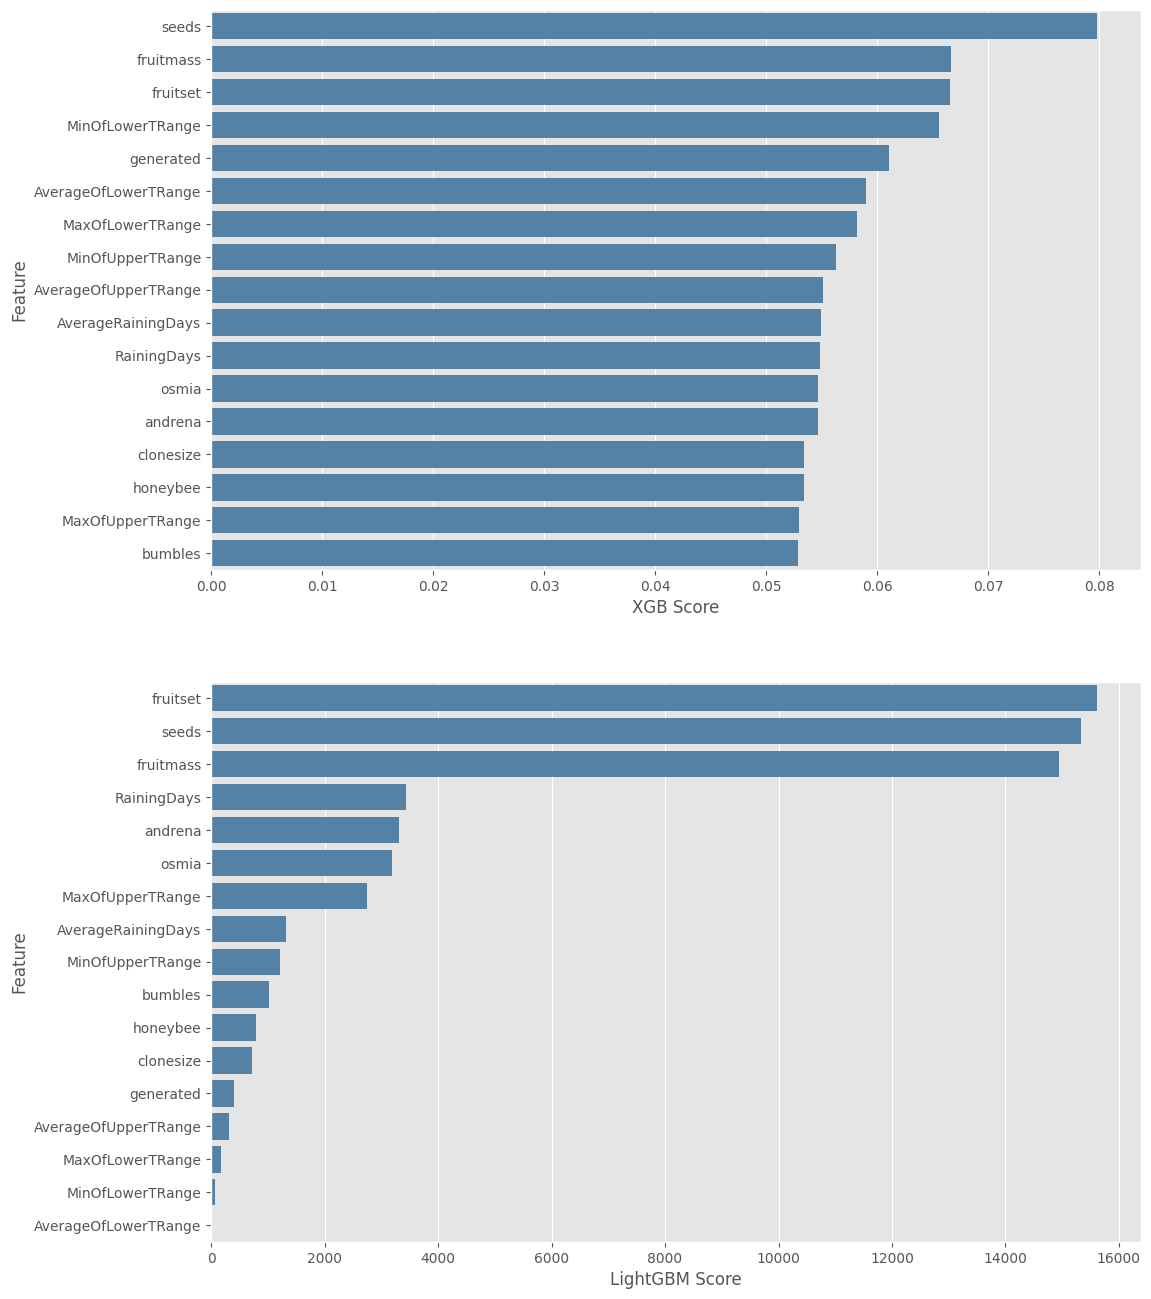

In [44]:
data1 = pd.DataFrame(pd.DataFrame(xgb_imp, columns = X.columns).apply(np.mean, axis = 0))
data1['Feature'] = data1.index
data1.columns = ['XGB Score', 'Feature']
data1.reset_index(drop = True, inplace = True)
data1.sort_values(by = 'XGB Score', ascending = False, inplace = True)

data2 = pd.DataFrame(pd.DataFrame(lgb_imp, columns = X.columns).apply(np.mean, axis = 0))
data2['Feature'] = data2.index
data2.columns = ['LightGBM Score', 'Feature']
data2.reset_index(drop = True, inplace = True)
data2.sort_values(by = 'LightGBM Score', ascending = False, inplace = True)

fig, axes = plt.subplots(2, 1, figsize = (12, 16))
sns.barplot(ax = axes[0], data = data1, x = 'XGB Score', y = 'Feature', color = 'steelblue')
sns.barplot(ax = axes[1], data = data2, x = 'LightGBM Score', y = 'Feature', color = 'steelblue');

In [45]:
hist_preds_test = pd.DataFrame(hist_preds).apply(np.mean, axis = 0)
lgb_preds_test = pd.DataFrame(lgb_preds).apply(np.mean, axis = 0)
xgb_preds_test = pd.DataFrame(xgb_preds).apply(np.mean, axis = 0)
ens_preds_test = pd.DataFrame(ens_preds).apply(np.mean, axis = 0)

submission['yield'] = hist_preds_test
submission.to_csv('Hist_Baseline_submission.csv', index = False)

submission['yield'] = lgb_preds_test
submission.to_csv('LightGBM_Baseline_submission.csv', index = False)

submission['yield'] = xgb_preds_test
submission.to_csv('XGBoost_Baseline_submission.csv', index = False)

submission['yield'] = ens_preds_test
submission.to_csv('Ensemble_Baseline_submission.csv', index = False)

<a id="7"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 2.0</h1>

In the previous section, we build three baseline models using raw data. From those results, we see that `HistGradientBoosting` and `LightGBM` perform well on this data. Next, we try to make improvements on those two models. We start by creating the `PartialDependencyPlots` to identify useful features to predict `yield`.

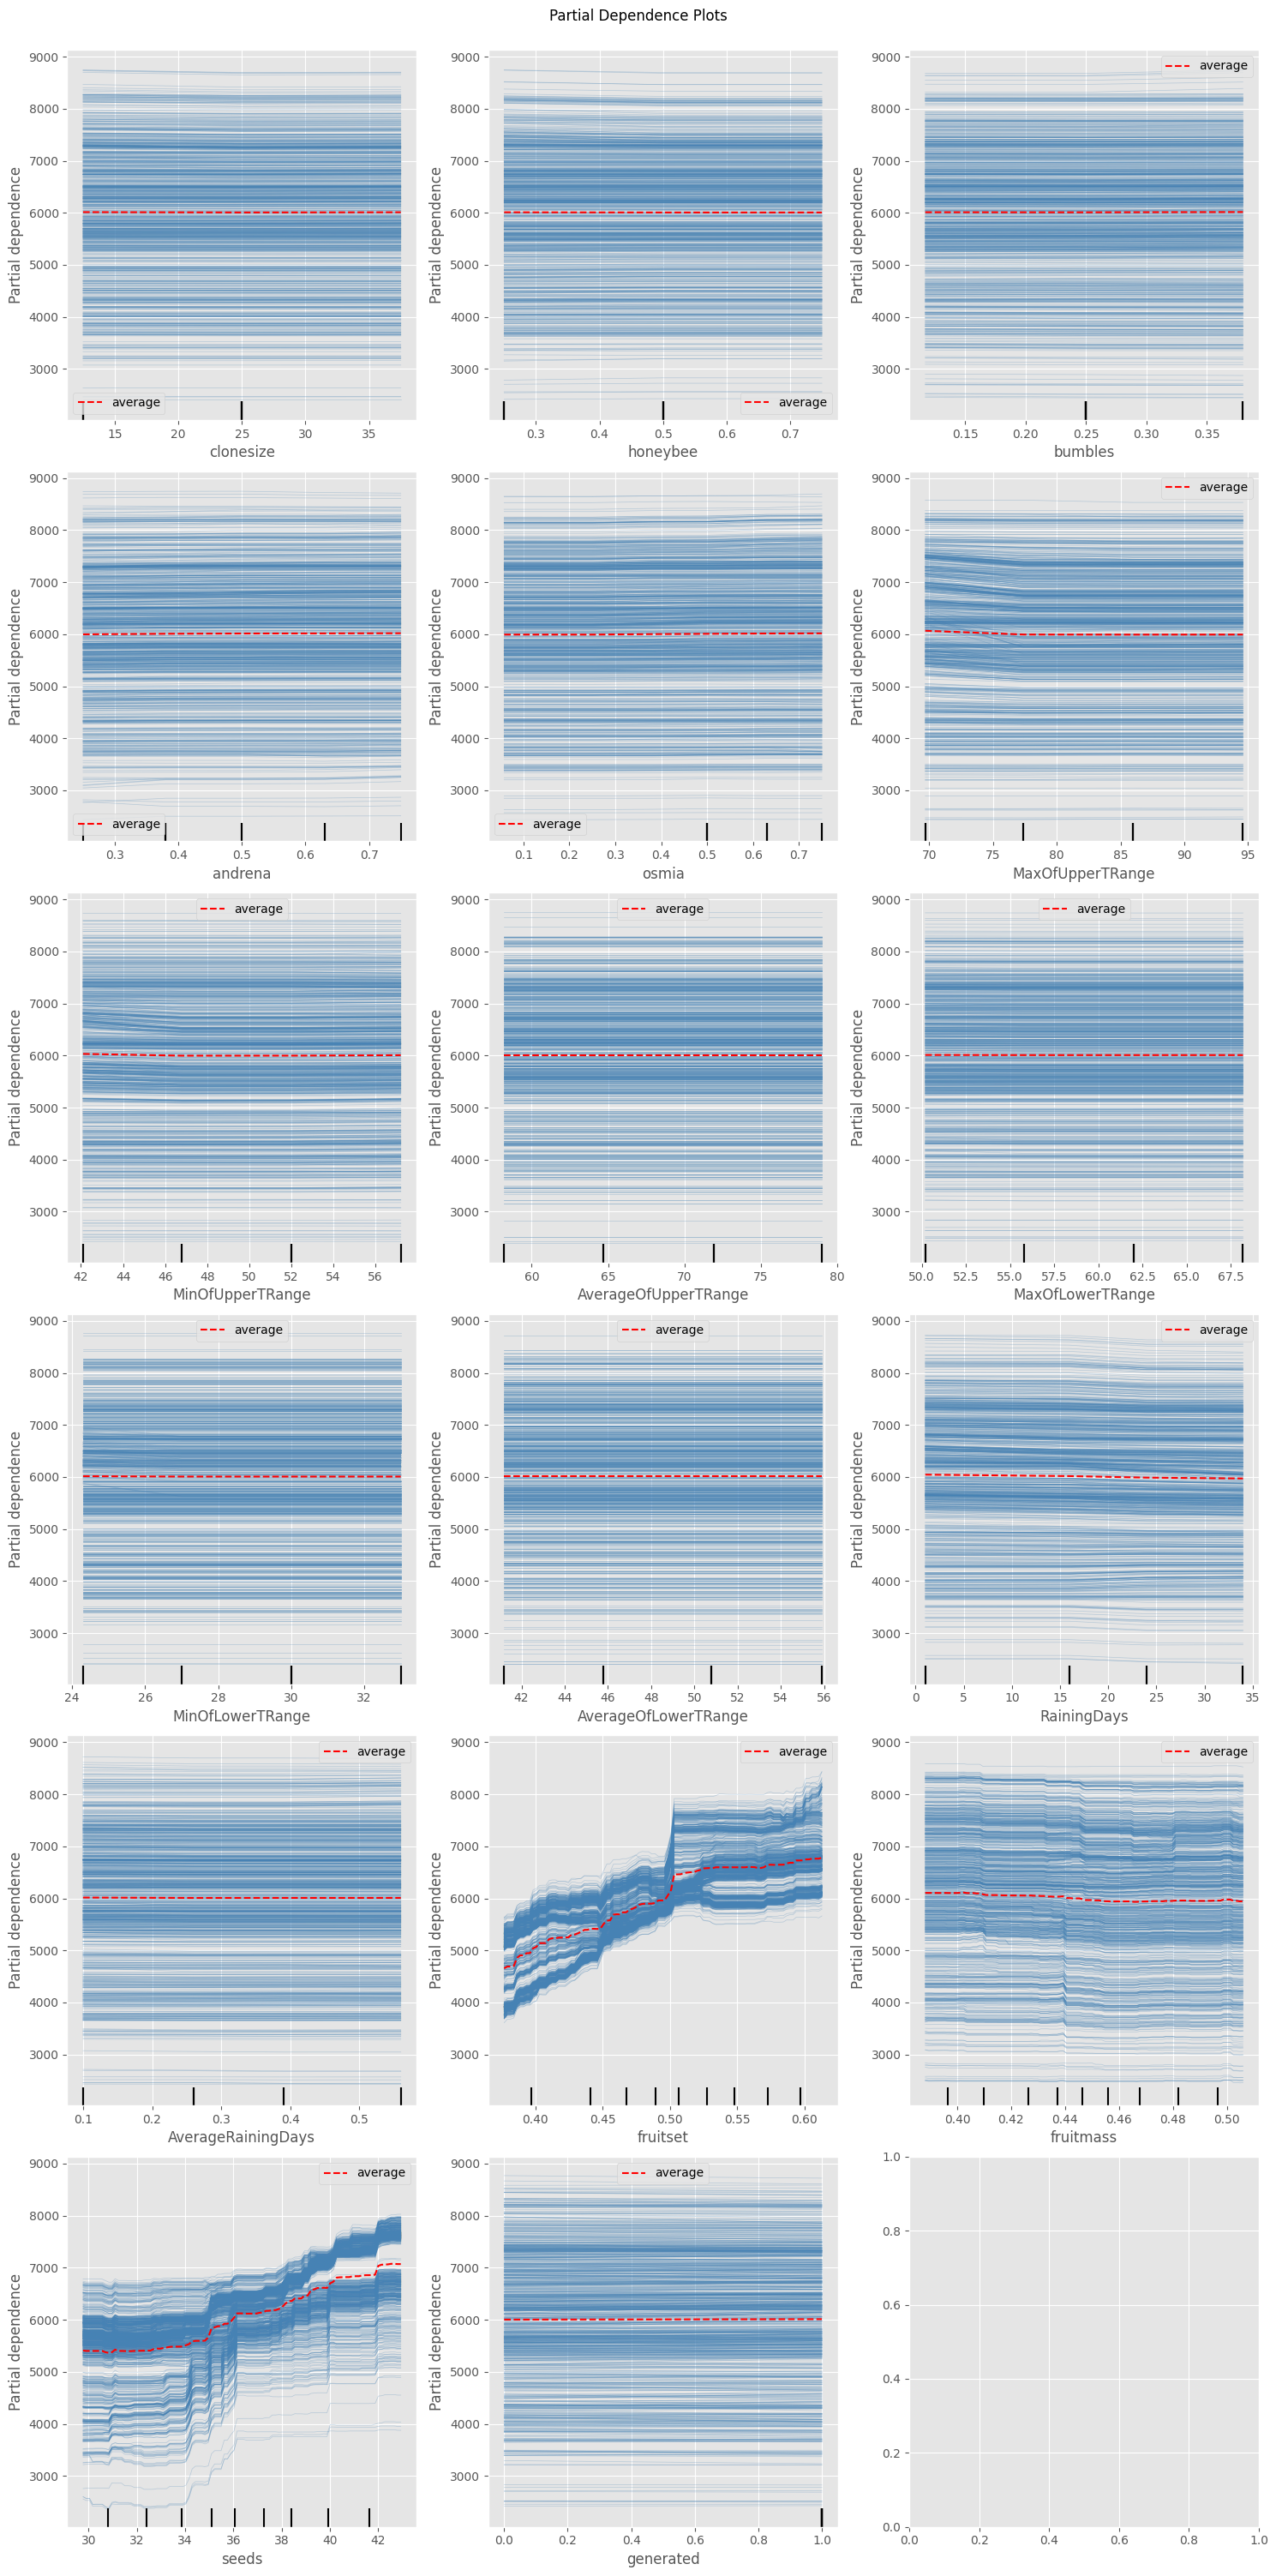

In [46]:
X = train.drop(columns = ['yield'], axis = 1)
Y = train['yield']

model = HistGradientBoostingRegressor(loss = 'absolute_error',
                                      l2_regularization = 0.01,
                                      early_stopping = False,
                                      learning_rate = 0.01,
                                      max_iter = 1000,
                                      max_depth = 10,
                                      max_bins = 255,
                                      min_samples_leaf = 20,
                                      max_leaf_nodes = 20).fit(X, Y)

fig, axs = plt.subplots(6, 3, figsize = (15, 30))
plt.suptitle('Partial Dependence Plots', y = 1.0)
PartialDependenceDisplay.from_estimator(model, X, X.columns.tolist(), 
                                        pd_line_kw = {"color": "red"},
                                        ice_lines_kw = {"color": "steelblue"},
                                        kind = 'both', 
                                        ax = axs.ravel()[:len(X.columns.tolist())])

plt.tight_layout(h_pad = 0.5, w_pad = 0.5)
plt.show();

From the partial plots, we see that:

- `seeds` and `fuitset` are important features to predict `yield`.
- `fruitmass` seems to be important but not as important as `seeds` and `fuitset`.

Next we proceed to re-train the `HistGradientBoosting`  and `LightGBM` models. Notice that I am including a post-processing trick discussed in this [post](https://www.kaggle.com/competitions/playground-series-s3e14/discussion/407327)

In [47]:
X = train[['clonesize', 'bumbles', 'MinOfLowerTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'generated']].copy()
X['interaction_1'] = X['clonesize'] * X['bumbles']
X.drop(columns = ['clonesize', 'bumbles'], axis = 1, inplace = True)

Y = train['yield']

test_baseline = test[['clonesize', 'bumbles', 'MinOfLowerTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'generated']].copy()
test_baseline['interaction_1'] = test_baseline['clonesize'] * test_baseline['bumbles']
test_baseline.drop(columns = ['clonesize', 'bumbles'], axis = 1, inplace = True)

hist_cv_scores, hist_preds = list(), list()
lgb_cv_scores, lgb_preds = list(), list()

skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
    
for train_ix, test_ix in tqdm(skf.split(X, Y)):
        
    ## Splitting the data 
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
    ##########################
    ## HistGradientBoosting ##
    ##########################
        
    hist_md = HistGradientBoostingRegressor(loss = 'absolute_error',
                                            l2_regularization = 0.01,
                                            early_stopping = False,
                                            learning_rate = 0.01,
                                            max_iter = 5000, 
                                            max_depth = 10,  
                                            max_bins = 255, 
                                            min_samples_leaf = 20, 
                                            max_leaf_nodes = 20).fit(X_train, Y_train) 
    unique_targets = np.unique(Y_train)    
        
    ## Predicting on X_test (we only evaluate the model on the competition data) and test
    hist_pred_1 = hist_md.predict(X_test[X_test['generated'] == 1])
    hist_pred_1 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in hist_pred_1]
    
    hist_pred_2 = hist_md.predict(test_baseline)
    hist_pred_2 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in hist_pred_2]
    
    hist_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], hist_pred_1))
    hist_preds.append(hist_pred_2)
    
    ##############
    ## LightGBM ##
    ##############
    
    lgb_md = LGBMRegressor(objective = 'mae',
                           n_estimators = 5000, 
                           max_depth = 5,  
                           learning_rate = 0.01,
                           num_leaves = 50, 
                           min_child_samples = 20,
                           reg_alpha = 0.001, 
                           reg_lambda = 0.01,
                           subsample = 0.7, 
                           colsample_bytree = 0.8, 
                           device = 'gpu').fit(X_train, Y_train)
                
    ## Predicting on X_test (we only evaluate the model on the competition data) and test
    lgb_pred_1 = lgb_md.predict(X_test[X_test['generated'] == 1])
    lgb_pred_1 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in lgb_pred_1]
    
    lgb_pred_2 = lgb_md.predict(test_baseline)
    lgb_pred_2 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in lgb_pred_2]
    
    lgb_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], lgb_pred_1))
    lgb_preds.append(lgb_pred_2)

0it [00:00, ?it/s]

In [48]:
print('The average oof mae of the HistGradientBoosting models is', np.mean(hist_cv_scores))
print('The average oof mae of the LightGBM models is', np.mean(lgb_cv_scores))

The average oof mae of the HistGradientBoosting models is 341.4256803623799
The average oof mae of the LightGBM models is 340.4029415153884


From the above, we see an improvement in the local cv-score in both models. Next, we proceed to aggregate the prediction of the 10-folds (using the oof mae as weight). 

In [49]:
w_hist = 1 / np.array(hist_cv_scores)
wtot_hist = np.sum(w_hist)
w_hist = w_hist / wtot_hist

w_lgb = 1 / np.array(lgb_cv_scores)
wtot_lgb = np.sum(w_lgb)
w_lgb = w_lgb / wtot_lgb

hist_test_preds = 0
lgb_test_preds = 0
for i in range(0, 10):
    hist_test_preds += w_hist[i] * np.array(hist_preds[i])
    lgb_test_preds += w_lgb[i] * np.array(lgb_preds[i])
        
submission['yield'] = hist_test_preds
submission.to_csv('Hist_submission.csv', index = False)

submission['yield'] = lgb_test_preds
submission.to_csv('LightGBM_submission.csv', index = False)

submission['yield'] = (hist_test_preds + lgb_test_preds) / 2
submission.to_csv('Ensemble_submission.csv', index = False)

<a id="8"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 3.0</h1>

In this section, I will try to improve the performance of the `LigthGBM` model.

In [50]:
X = train[['clonesize', 'bumbles', 'osmia', 'andrena', 'MinOfLowerTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'generated']].copy()
Y = train['yield']

test_baseline = test[['clonesize', 'bumbles', 'osmia', 'andrena', 'MinOfLowerTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'generated']].copy()


lgb_cv_scores, lgb_preds = list(), list()

skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
    
for train_ix, test_ix in tqdm(skf.split(X, Y)):
            
    ## Splitting the data 
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
    ##############
    ## LightGBM ##
    ##############
        
    lgb_md = LGBMRegressor(objective = 'mae',
                           n_estimators = 5000, 
                           max_depth = 7,   
                           learning_rate = 0.01,
                           num_leaves = 50, 
                           min_child_samples = 20,
                           reg_alpha = 0.001, 
                           reg_lambda = 0.01,
                           subsample = 0.7, 
                           colsample_bytree = 0.8, 
                           device = 'gpu').fit(X_train, Y_train)
    
    unique_targets = np.unique(Y_train)
                
    ## Predicting on X_test (we only evaluate the model on the competition data) and test
    lgb_pred_1 = lgb_md.predict(X_test[X_test['generated'] == 1])
    lgb_pred_1 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in lgb_pred_1]
    
    lgb_pred_2 = lgb_md.predict(test_baseline)
    lgb_pred_2 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in lgb_pred_2]
    
    ## Computing mae
    lgb_cv_scores.append(mean_absolute_error(Y_test[X_test['generated'] == 1], lgb_pred_1))
    lgb_preds.append(lgb_pred_2)

0it [00:00, ?it/s]

In [51]:
print('The average oof mae of the LightGBM models is', np.mean(lgb_cv_scores))

The average oof mae of the LightGBM models is 339.6541173388272


In [52]:
w_lgb = 1 / np.array(lgb_cv_scores)
wtot_lgb = np.sum(w_lgb)
w_lgb = w_lgb / wtot_lgb

lgb_test_preds = 0
for i in range(0, 10):
    lgb_test_preds += w_lgb[i] * np.array(lgb_preds[i])
    
submission['yield'] = lgb_test_preds
submission.to_csv('LightGBM_submission_1.csv', index = False)

<a id="9"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Baseline Modeling 4.0</h1>


In [53]:
X = train[['MinOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'generated']].copy()
Y = train['yield']

test_baseline = test[['MinOfUpperTRange', 'RainingDays', 'fruitset', 'fruitmass', 'seeds', 'generated']].copy()

gb_cv_scores, gb_preds = list(), list()
RF_cv_scores, RF_preds = list(), list()
ens_cv_scores, ens_preds = list(), list()

skf = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
    
for i, (train_ix, test_ix) in enumerate(skf.split(X, Y)):
            
    ## Splitting the data 
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    ######################
    ## GradientBoosting ##
    ######################
    
    gb_md = GradientBoostingRegressor(loss = 'absolute_error',
                                      n_estimators = 5000, 
                                      max_depth = 8, 
                                      learning_rate = 0.01,
                                      min_samples_split = 10, 
                                      min_samples_leaf = 20).fit(X_train, Y_train) 
                
    ###################
    ## Random Forest ##
    ###################
        
    RF_md = RandomForestRegressor(criterion = 'absolute_error',
                                  n_estimators = 150, 
                                  max_depth = 10, 
                                  min_samples_split = 10, 
                                  min_samples_leaf = 20,
                                  n_jobs = -1).fit(X_train, Y_train) 
    
    unique_targets = np.unique(Y_train)
    
    gb_pred_1 = gb_md.predict(X_test[X_test['generated'] == 1])
    gb_pred_1 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in gb_pred_1]
    
    gb_pred_2 = gb_md.predict(test_baseline)
    gb_pred_2 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in gb_pred_2]
    
    RF_pred_1 = RF_md.predict(X_test[X_test['generated'] == 1])
    RF_pred_1 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in RF_pred_1]
    
    RF_pred_2 = RF_md.predict(test_baseline)
    RF_pred_2 = [min(unique_targets, key = lambda x: abs(x - pred)) for pred in RF_pred_2]
    
    gb_score = mean_absolute_error(Y_test[X_test['generated'] == 1], gb_pred_1)
    RF_score = mean_absolute_error(Y_test[X_test['generated'] == 1], RF_pred_1)

    gb_cv_scores.append(gb_score)
    gb_preds.append(gb_pred_2)
    
    print('Fold', i, ' ==> GradientBoosting oof mae is ==>', gb_score)
    
    RF_cv_scores.append(RF_score)
    RF_preds.append(RF_pred_2)
    
    print('Fold', i, ' ==> Random Forest oof mae is ==>', RF_score)
    
    w = 1 / np.array([gb_score, RF_score])
    wtot = np.sum(w)
    w = w / wtot
    
    ens = w[0]*np.array(gb_pred_1) + w[1]*np.array(RF_pred_1)
    ens_score = mean_absolute_error(Y_test[X_test['generated'] == 1], ens)
    
    ens_cv_scores.append(ens_score)
    ens_preds.append(w[0]*np.array(gb_pred_2) + w[1]*np.array(RF_pred_2))
    
    print('Fold', i, ' ==> Ensemble oof mae is ==>', ens_score)

Fold 0  ==> GradientBoosting oof mae is ==> 352.57373096673194
Fold 0  ==> Random Forest oof mae is ==> 351.0563132772342
Fold 0  ==> Ensemble oof mae is ==> 349.20209071315793
Fold 1  ==> GradientBoosting oof mae is ==> 326.7298412568016
Fold 1  ==> Random Forest oof mae is ==> 330.2629887982747
Fold 1  ==> Ensemble oof mae is ==> 326.1809681602186
Fold 2  ==> GradientBoosting oof mae is ==> 335.94822981606217
Fold 2  ==> Random Forest oof mae is ==> 335.41570027461137
Fold 2  ==> Ensemble oof mae is ==> 332.82526733744595
Fold 3  ==> GradientBoosting oof mae is ==> 342.02439888308294
Fold 3  ==> Random Forest oof mae is ==> 341.48794724363165
Fold 3  ==> Ensemble oof mae is ==> 340.0800804128558
Fold 4  ==> GradientBoosting oof mae is ==> 332.28711374607326
Fold 4  ==> Random Forest oof mae is ==> 330.6437506839005
Fold 4  ==> Ensemble oof mae is ==> 329.76657937263053
Fold 5  ==> GradientBoosting oof mae is ==> 337.85963573921566
Fold 5  ==> Random Forest oof mae is ==> 341.18375239

In [54]:
ens_cv_score = np.mean(ens_cv_scores)
print('The oof mae of the ensemble is', ens_cv_score)

The oof mae of the ensemble is 338.3190190333797


In [55]:
w_ens = 1 / np.array(ens_cv_scores)
wtot_ens = np.sum(w_ens)
w_ens = w_ens / wtot_ens

ens_test_preds = 0
for i in range(0, 10):
    ens_test_preds += w_ens[i] * np.array(ens_preds[i])
    
submission['yield'] = ens_test_preds
submission.to_csv('GBC_RF_submission.csv', index = False)